# WIDS 2025 ADHD Prediction - Exploratory Data Analysis

This notebook explores the training data for the WiDS 2025 Datathon ADHD prediction challenges.

## Setup

In [29]:
import sys
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display

from src.data.load_data import load_train_data, get_data_info

# # Add src to path
project_dir = Path.cwd().parent
sys.path.append(str(project_dir))


# Set plotting style
sns.set_palette("husl")

## Load Data

In [13]:
data_dir = project_dir / "data/raw/train"
dfs = load_train_data(data_dir)

info = get_data_info(dfs)

for name, df in dfs.items():
    print(f"\n{name.upper()} Dataset:")
    print(f"Shape: {df.shape}")
    print("\nSample of columns:", df.columns[:5].tolist())
    print("\nData types:")
    print(df.dtypes.value_counts())
    display(df.head())


CATEGORICAL Dataset:
Shape: (1213, 10)

Sample of columns: ['participant_id', 'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site', 'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race']

Data types:
int64      8
object     1
float64    1
Name: count, dtype: int64


participant_id  Basic_Demos_Enroll_Year  Basic_Demos_Study_Site  \
0   UmrK0vMLopoR                     2016                       1   
1   CPaeQkhcjg7d                     2019                       3   
2   Nb4EetVPm3gs                     2016                       1   
3   p4vPhVu91o4b                     2018                       3   
4   M09PXs7arQ5E                     2019                       3   

   PreInt_Demos_Fam_Child_Ethnicity  PreInt_Demos_Fam_Child_Race  \
0                               0.0                            0   
1                               1.0                            2   
2                               1.0                            8   
3                               0.0                            8   
4                               0.0                            1   

   MRI_Track_Scan_Location  Barratt_Barratt_P1_Edu  Barratt_Barratt_P1_Occ  \
0                        1                      21                      45   
1                        3                      15                      15   
2                        1                      18                      40   
3                        3                      15                      30   
4                        3                      15                      20   

   Barratt_Barratt_P2_Edu  Barratt_Barratt_P2_Occ  
0                      21                      45  
1                       0                       0  
2                       0                       0  
3                      18                       0  
4                       0                       0


CONNECTOME Dataset:
Shape: (1213, 19901)

Sample of columns: ['participant_id', '0throw_1thcolumn', '0throw_2thcolumn', '0throw_3thcolumn', '0throw_4thcolumn']

Data types:
float64    19900
object         1
Name: count, dtype: int64


participant_id  0throw_1thcolumn  0throw_2thcolumn  0throw_3thcolumn  \
0   70z8Q2xdTXM3          0.093473          0.146902          0.067893   
1   WHWymJu6zNZi          0.029580          0.179323          0.112933   
2   4PAQp1M6EyAo         -0.051580          0.139734          0.068295   
3   obEacy4Of68I          0.016273          0.204702          0.115980   
4   s7WzzDcmDOhF          0.065771          0.098714          0.097604   

   0throw_4thcolumn  0throw_5thcolumn  0throw_6thcolumn  0throw_7thcolumn  \
0          0.015141          0.070221          0.063997          0.055382   
1          0.038291          0.104899          0.064250          0.008488   
2          0.046991          0.111085          0.026978          0.151377   
3          0.043103          0.056431          0.057615          0.055773   
4          0.112988          0.071139          0.085607          0.019392   

   0throw_8thcolumn  0throw_9thcolumn  ...  195throw_196thcolumn  \
0         -0.035335          0.068583  ...              0.003404   
1          0.077505         -0.004750  ...             -0.008409   
2          0.021198          0.083721  ...              0.053245   
3          0.075030          0.001033  ...             -0.023918   
4         -0.036403         -0.020375  ...              0.066439   

   195throw_197thcolumn  195throw_198thcolumn  195throw_199thcolumn  \
0             -0.010359             -0.050968             -0.014365   
1             -0.008479              0.020891              0.017754   
2             -0.028003              0.028773              0.024556   
3             -0.005356              0.018607              0.016193   
4             -0.076680             -0.047530             -0.031443   

   196throw_197thcolumn  196throw_198thcolumn  196throw_199thcolumn  \
0              0.128066              0.112646             -0.058980   
1              0.094040              0.035141              0.032537   
2              0.166343              0.058925              0.035485   
3              0.072955              0.130135              0.056120   
4              0.221213              0.007343              0.005763   

   197throw_198thcolumn  197throw_199thcolumn  198throw_199thcolumn  
0              0.028228              0.133582              0.143372  
1              0.075007              0.115350              0.138200  
2              0.063661              0.042862              0.162162  
3              0.084784              0.114148              0.190584  
4              0.083820              0.079582              0.067269  

[5 rows x 19901 columns]


QUANTITATIVE Dataset:
Shape: (1213, 19)

Sample of columns: ['participant_id', 'EHQ_EHQ_Total', 'ColorVision_CV_Score', 'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID']

Data types:
int64      16
float64     2
object      1
Name: count, dtype: int64


participant_id  EHQ_EHQ_Total  ColorVision_CV_Score  APQ_P_APQ_P_CP  \
0   UmrK0vMLopoR          40.00                    13               3   
1   CPaeQkhcjg7d         -94.47                    14               3   
2   Nb4EetVPm3gs         -46.67                    14               4   
3   p4vPhVu91o4b         -26.68                    10               5   
4   M09PXs7arQ5E           0.00                    14               5   

   APQ_P_APQ_P_ID  APQ_P_APQ_P_INV  APQ_P_APQ_P_OPD  APQ_P_APQ_P_PM  \
0              10               47               13              11   
1              13               34               18              23   
2              10               35               16              10   
3              12               39               19              16   
4              15               40               20              24   

   APQ_P_APQ_P_PP  SDQ_SDQ_Conduct_Problems  SDQ_SDQ_Difficulties_Total  \
0              28                         0                           6   
1              30                         0                          18   
2              29                         1                          14   
3              28                         6                          24   
4              28                         1                          18   

   SDQ_SDQ_Emotional_Problems  SDQ_SDQ_Externalizing  \
0                           1                      5   
1                           6                      8   
2                           2                      8   
3                           4                     16   
4                           4                     11   

   SDQ_SDQ_Generating_Impact  SDQ_SDQ_Hyperactivity  SDQ_SDQ_Internalizing  \
0                          0                      5                      1   
1                          7                      8                     10   
2                          5                      7                      6   
3                          9                     10                      8   
4                          4                     10                      7   

   SDQ_SDQ_Peer_Problems  SDQ_SDQ_Prosocial  MRI_Track_Age_at_Scan  
0                      0                 10                    NaN  
1                      4                  5                    NaN  
2                      4                  9               8.239904  
3                      4                  6                    NaN  
4                      3                  9               8.940679


TARGETS Dataset:
Shape: (1213, 3)

Sample of columns: ['participant_id', 'ADHD_Outcome', 'Sex_F']

Data types:
int64     2
object    1
Name: count, dtype: int64


participant_id  ADHD_Outcome  Sex_F
0   UmrK0vMLopoR             1      1
1   CPaeQkhcjg7d             1      0
2   Nb4EetVPm3gs             1      0
3   p4vPhVu91o4b             1      1
4   M09PXs7arQ5E             1      1

## Data Type Analysis

In [24]:
def analyze_column_types(df, name):
    """Analyze column types and print summary."""
    print(f"\n{name} Dataset Column Analysis:")
    for col in df.columns:
        unique_vals = df[col].nunique()
        print(f"\n{col}:")
        print(f"Type: {df[col].dtype}")
        print(f"Unique values: {unique_vals}")
        print(f"Sample values: {df[col].head().tolist()}")


for name, df in dfs.items():
    analyze_column_types(df, name)


categorical Dataset Column Analysis:

participant_id:
Type: object
Unique values: 1213
Sample values: ['UmrK0vMLopoR', 'CPaeQkhcjg7d', 'Nb4EetVPm3gs', 'p4vPhVu91o4b', 'M09PXs7arQ5E']

Basic_Demos_Enroll_Year:
Type: int64
Unique values: 6
Sample values: [2016, 2019, 2016, 2018, 2019]

Basic_Demos_Study_Site:
Type: int64
Unique values: 4
Sample values: [1, 3, 1, 3, 3]

PreInt_Demos_Fam_Child_Ethnicity:
Type: float64
Unique values: 4
Sample values: [0.0, 1.0, 1.0, 0.0, 0.0]

PreInt_Demos_Fam_Child_Race:
Type: int64
Unique values: 10
Sample values: [0, 2, 8, 8, 1]

MRI_Track_Scan_Location:
Type: int64
Unique values: 5
Sample values: [1, 3, 1, 3, 3]

Barratt_Barratt_P1_Edu:
Type: int64
Unique values: 8
Sample values: [21, 15, 18, 15, 15]

Barratt_Barratt_P1_Occ:
Type: int64
Unique values: 10
Sample values: [45, 15, 40, 30, 20]

Barratt_Barratt_P2_Edu:
Type: int64
Unique values: 8
Sample values: [21, 0, 0, 18, 0]

Barratt_Barratt_P2_Occ:
Type: int64
Unique values: 10
Sample values: [45, 0, 

## Target Variable Analysis

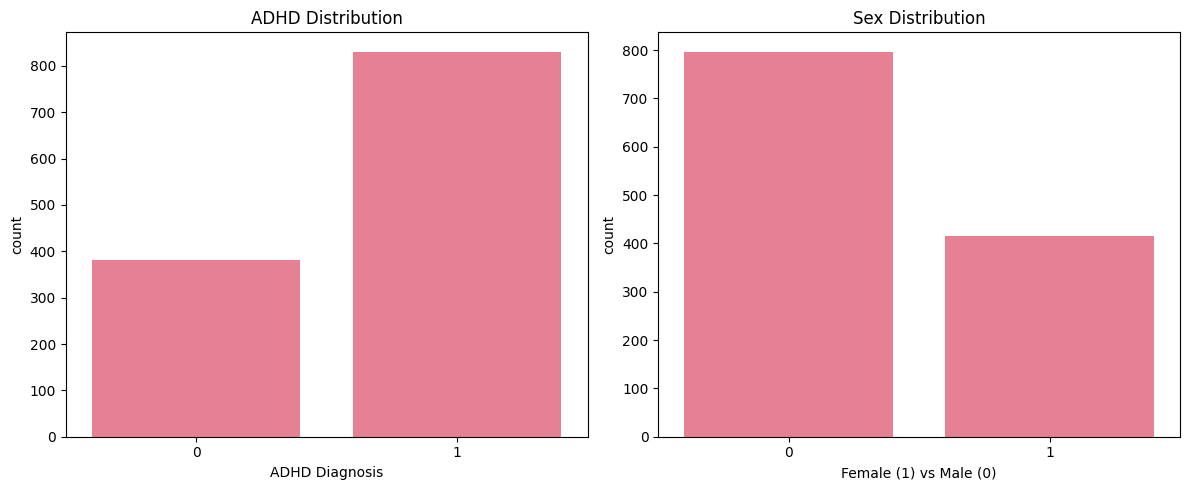

In [5]:
target_df = dfs["targets"]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# ADHD Distribution
sns.countplot(data=target_df, x="ADHD_Outcome", ax=ax1)
ax1.set_title("ADHD Distribution")
ax1.set_xlabel("ADHD Diagnosis")

# Sex Distribution
sns.countplot(data=target_df, x="Sex_F", ax=ax2)
ax2.set_title("Sex Distribution")
ax2.set_xlabel("Female (1) vs Male (0)")

plt.tight_layout()
plt.show()

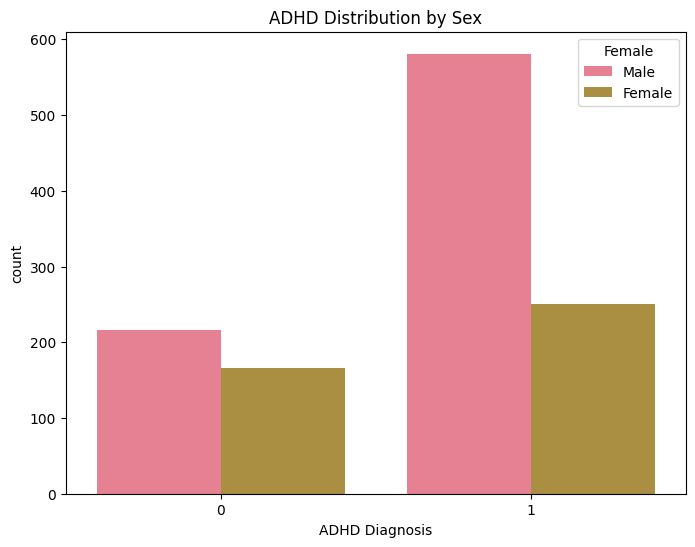

In [6]:
# Distribution of ADHD by Sex
plt.figure(figsize=(8, 6))
sns.countplot(data=target_df, x="ADHD_Outcome", hue="Sex_F")
plt.title("ADHD Distribution by Sex")
plt.xlabel("ADHD Diagnosis")
plt.legend(title="Female", labels=["Male", "Female"])
plt.show()

## Categorical Metadata Anaylsis

In [7]:
cat_df = dfs["categorical"]

print("Categorical Variables Summary:")
for col in cat_df.columns:
    print(f"\n{col}:")
    display(cat_df[col].value_counts().head())

Categorical Variables Summary:

participant_id:


participant_id
UmrK0vMLopoR    1
KEqbR8zp5caZ    1
xVQ9g4GVYGTY    1
GNUNEuXljvHF    1
fKQY0gay4y9E    1
Name: count, dtype: int64


Basic_Demos_Enroll_Year:


Basic_Demos_Enroll_Year
2018    415
2019    312
2017    254
2016    191
2015     36
Name: count, dtype: int64


Basic_Demos_Study_Site:


Basic_Demos_Study_Site
1    652
3    430
4    120
2     11
Name: count, dtype: int64


PreInt_Demos_Fam_Child_Ethnicity:


PreInt_Demos_Fam_Child_Ethnicity
0.0    809
1.0    296
2.0     77
3.0     20
Name: count, dtype: int64


PreInt_Demos_Fam_Child_Race:


PreInt_Demos_Fam_Child_Race
0    627
8    195
1    181
2    128
3     30
Name: count, dtype: int64


MRI_Track_Scan_Location:


MRI_Track_Scan_Location
2    532
3    463
1    179
4     36
0      3
Name: count, dtype: int64


Barratt_Barratt_P1_Edu:


Barratt_Barratt_P1_Edu
21    470
18    421
15    162
12     97
9      28
Name: count, dtype: int64


Barratt_Barratt_P1_Occ:


Barratt_Barratt_P1_Occ
0     317
35    219
45    187
40    154
30    154
Name: count, dtype: int64


Barratt_Barratt_P2_Edu:


Barratt_Barratt_P2_Edu
21    323
18    301
0     198
15    166
12    162
Name: count, dtype: int64


Barratt_Barratt_P2_Occ:


Barratt_Barratt_P2_Occ
0     287
45    239
35    195
30    149
40    116
Name: count, dtype: int64

## Quantitative Metadata Analysis

In [15]:
quant_df = dfs["quantitative"]

non_numeric_cols = quant_df.select_dtypes(exclude=["int64", "float64"]).columns
if len(non_numeric_cols) > 0:
    print("Non-numeric columns found:", non_numeric_cols.tolist())
    quant_df = quant_df.apply(pd.to_numeric, errors="coerce")

print("Quantitative Variables Summary:")
display(quant_df.describe())

Non-numeric columns found: ['participant_id']
Quantitative Variables Summary:


participant_id  EHQ_EHQ_Total  ColorVision_CV_Score  APQ_P_APQ_P_CP  \
count             0.0    1213.000000           1213.000000     1213.000000   
mean              NaN      58.876917             13.164880        3.781533   
std               NaN      49.855501              2.780624        1.376700   
min               NaN    -100.000000              0.000000        0.000000   
25%               NaN      45.600000             14.000000        3.000000   
50%               NaN      76.670000             14.000000        3.000000   
75%               NaN      93.400000             14.000000        4.000000   
max               NaN     100.000000             14.000000       12.000000   

       APQ_P_APQ_P_ID  APQ_P_APQ_P_INV  APQ_P_APQ_P_OPD  APQ_P_APQ_P_PM  \
count     1213.000000      1213.000000      1213.000000     1213.000000   
mean        13.205276        39.374279        17.785655       16.393240   
std          3.811772         6.245928         3.764112        5.376994   
min          0.000000         0.000000         0.000000        0.000000   
25%         11.000000        36.000000        16.000000       13.000000   
50%         13.000000        40.000000        18.000000       16.000000   
75%         16.000000        43.000000        20.000000       19.000000   
max         28.000000        50.000000        28.000000       37.000000   

       APQ_P_APQ_P_PP  SDQ_SDQ_Conduct_Problems  SDQ_SDQ_Difficulties_Total  \
count     1213.000000               1213.000000                 1213.000000   
mean        25.246496                  2.059357                   12.122836   
std          3.950529                  2.023322                    6.577207   
min          0.000000                  0.000000                    0.000000   
25%         23.000000                  0.000000                    7.000000   
50%         26.000000                  2.000000                   12.000000   
75%         28.000000                  3.000000                   17.000000   
max         30.000000                 10.000000                   34.000000   

       SDQ_SDQ_Emotional_Problems  SDQ_SDQ_Externalizing  \
count                 1213.000000            1213.000000   
mean                     2.307502               7.557296   
std                      2.167549               4.166627   
min                      0.000000               0.000000   
25%                      1.000000               4.000000   
50%                      2.000000               7.000000   
75%                      4.000000              10.000000   
max                     10.000000              20.000000   

       SDQ_SDQ_Generating_Impact  SDQ_SDQ_Hyperactivity  \
count                1213.000000            1213.000000   
mean                    4.073372               5.497939   
std                     2.819731               2.836764   
min                     0.000000               0.000000   
25%                     2.000000               4.000000   
50%                     4.000000               6.000000   
75%                     6.000000               8.000000   
max                    10.000000              10.000000   

       SDQ_SDQ_Internalizing  SDQ_SDQ_Peer_Problems  SDQ_SDQ_Prosocial  \
count            1213.000000            1213.000000        1213.000000   
mean                4.565540               2.258038           7.683430   
std                 3.519634               2.090414           2.190295   
min                 0.000000               0.000000           0.000000   
25%                 2.000000               0.000000           6.000000   
50%                 4.000000               2.000000           8.000000   
75%                 7.000000               4.000000          10.000000   
max                17.000000               9.000000          10.000000   

       MRI_Track_Age_at_Scan  
count             853.000000  
mean               11.245678  
std                 3.234372  
min                 0.000000  
25%                 8

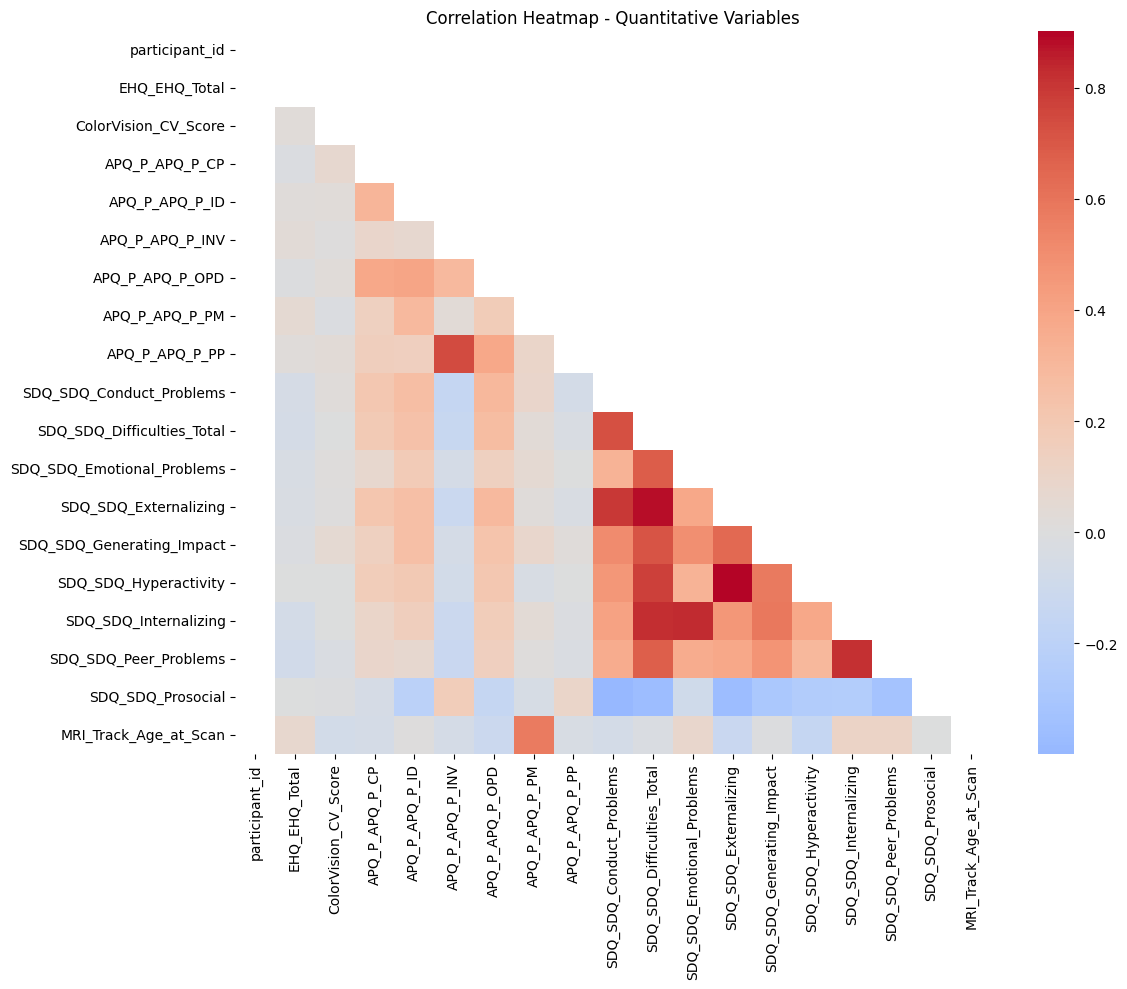

In [16]:
plt.figure(figsize=(12, 10))
corr_matrix = quant_df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, cmap="coolwarm", center=0, annot=False)
plt.title("Correlation Heatmap - Quantitative Variables")
plt.tight_layout()
plt.show()

## Connectome Matrix Analysis

In [17]:
conn_df = dfs["connectome"]

conn_df = conn_df.apply(pd.to_numeric, errors="coerce")

print("Connectome Matrix Summary:")
display(conn_df.describe())

Connectome Matrix Summary:


participant_id  0throw_1thcolumn  0throw_2thcolumn  0throw_3thcolumn  \
count             0.0       1213.000000       1213.000000       1213.000000   
mean              NaN          0.060553          0.122315          0.060268   
std               NaN          0.064178          0.054026          0.057495   
min               NaN         -0.183279         -0.059932         -0.145566   
25%               NaN          0.018482          0.086102          0.026548   
50%               NaN          0.058276          0.123220          0.061339   
75%               NaN          0.100103          0.154518          0.099056   
max               NaN          0.321522          0.390895          0.278429   

       0throw_4thcolumn  0throw_5thcolumn  0throw_6thcolumn  0throw_7thcolumn  \
count       1213.000000       1213.000000       1213.000000       1213.000000   
mean           0.041287          0.069722          0.091007          0.066852   
std            0.043491          0.044222          0.049189          0.046864   
min           -0.127827         -0.072043         -0.079184         -0.105722   
25%            0.014457          0.042462          0.057614          0.036934   
50%            0.043246          0.067066          0.086494          0.067247   
75%            0.068408          0.096504          0.119404          0.095117   
max            0.189825          0.317500          0.316811          0.270018   

       0throw_8thcolumn  0throw_9thcolumn  ...  195throw_196thcolumn  \
count       1213.000000       1213.000000  ...           1213.000000   
mean           0.000252          0.014128  ...              0.011075   
std            0.049046          0.038205  ...              0.049632   
min           -0.164297         -0.137728  ...             -0.161666   
25%           -0.031358         -0.010635  ...             -0.021376   
50%            0.002549          0.016130  ...              0.010254   
75%            0.031053          0.038770  ...              0.044165   
max            0.168196          0.145364  ...              0.194616   

       195throw_197thcolumn  195throw_198thcolumn  195throw_199thcolumn  \
count           1213.000000           1213.000000           1213.000000   
mean              -0.004938             -0.004378              0.001610   
std                0.046536              0.042900              0.047424   
min               -0.176523             -0.178688             -0.138048   
25%               -0.033424             -0.033798             -0.030132   
50%               -0.004683             -0.003724              0.000990   
75%                0.024913              0.024007              0.032268   
max                0.183152              0.180562              0.192015   

       196throw_197thcolumn  196throw_198thcolumn  196throw_199thcolumn  \
count           1213.000000           1213.000000           1213.000000   
mean               0.115171              0.049984              0.058144   
std                0.057128              0.051664              0.057674   
min               -0.070094             -0.153540             -0.131455   
25%                0.080291              0.015827              0.022316   
50%                0.113640              0.052705              0.059151   
75%                0.150524              0.082526              0.095192   
max                0.375635              0.228748              0.322084   

       197throw_198thcolumn  197throw_199thcolumn  198throw_199thcolumn  
count           1213.000000           1213.000000           1213.000000  
mean               0.093527              0.089403              0.128946  
std                0.054594              0.058036              0.058490  
min               -0.085566             -0.204160             -0.083077  
25%                0.059621              0.053224              0.090459  
50%                0.093397              0.088612              0.127913  
75%                0.127144              0.127

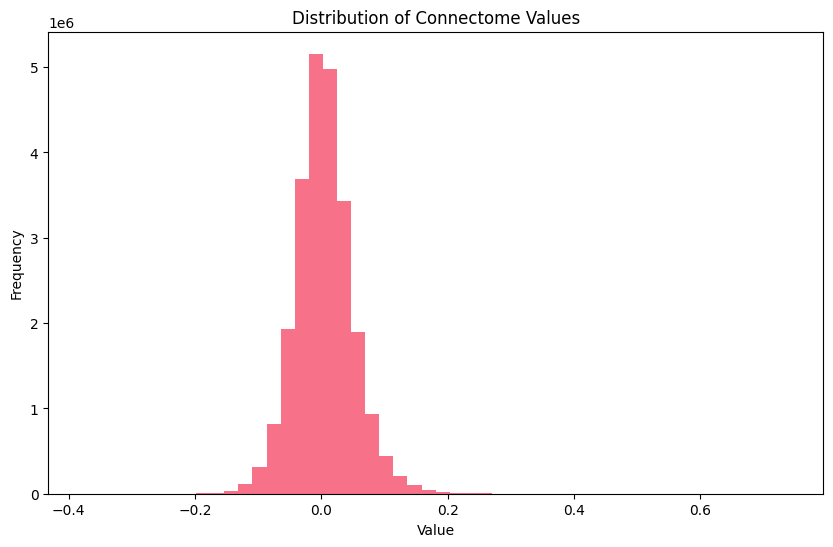

In [18]:
plt.figure(figsize=(10, 6))
plt.hist(conn_df.values.flatten(), bins=50)
plt.title("Distribution of Connectome Values")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

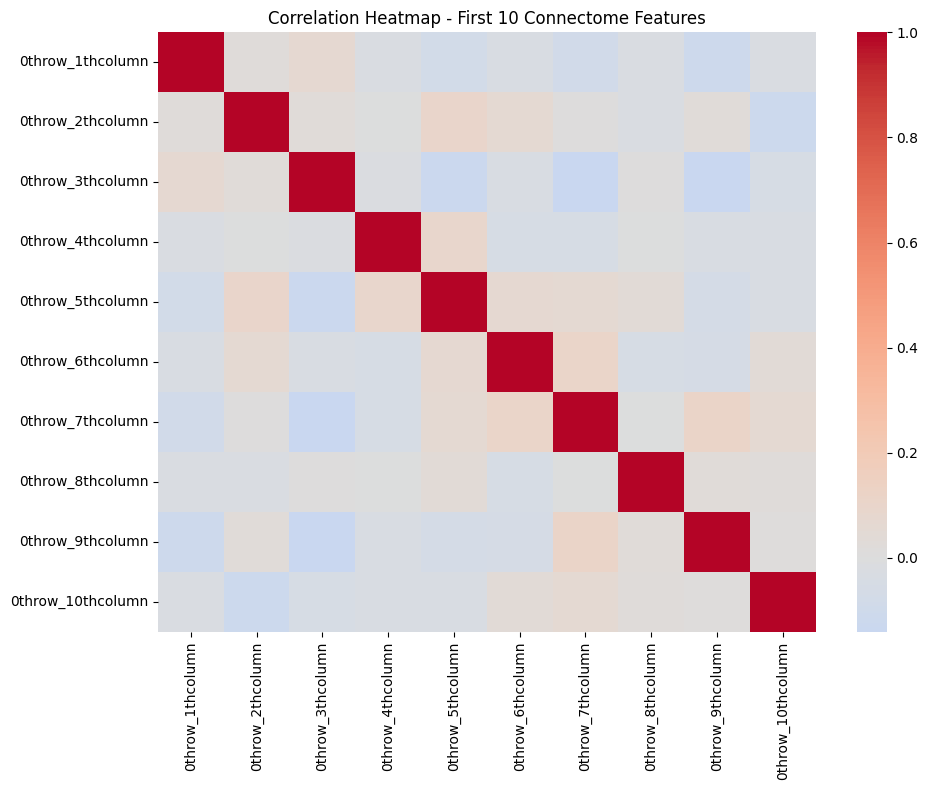

In [22]:
plt.figure(figsize=(10, 8))
sample_cols = conn_df.iloc[:, 1:11]
corr_matrix = sample_cols.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap - First 10 Connectome Features")
plt.tight_layout()
plt.show()

## Missing Value Analysis

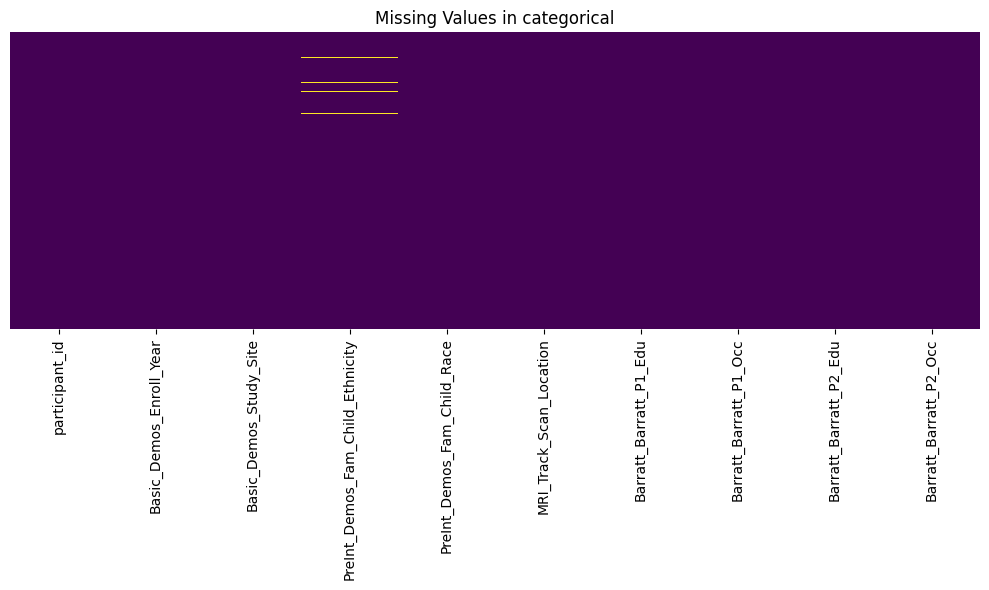


Missing values in categorical:


Missing Values  Percentage
PreInt_Demos_Fam_Child_Ethnicity              11    0.906843

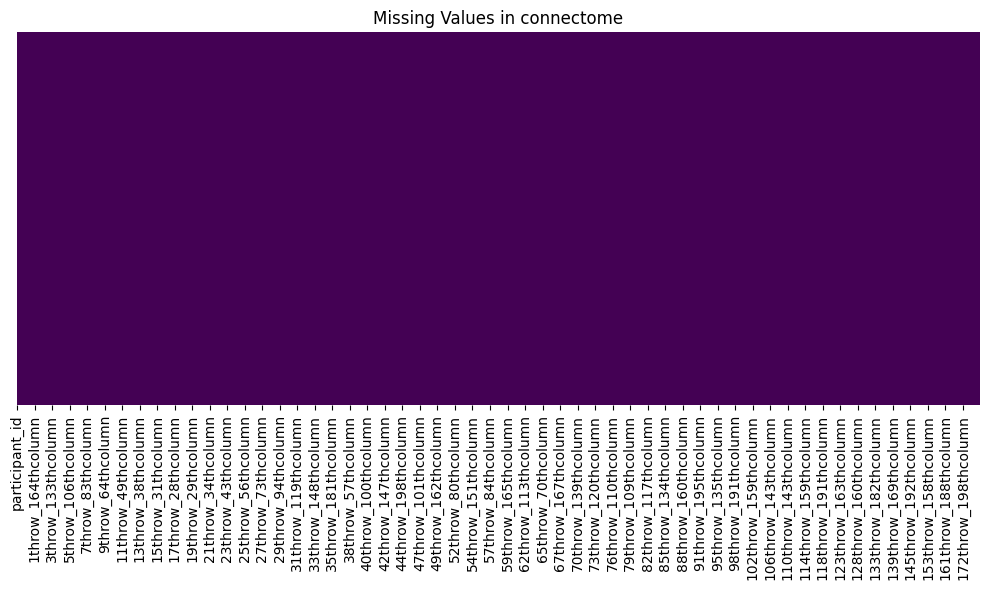


Missing values in connectome:


Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []

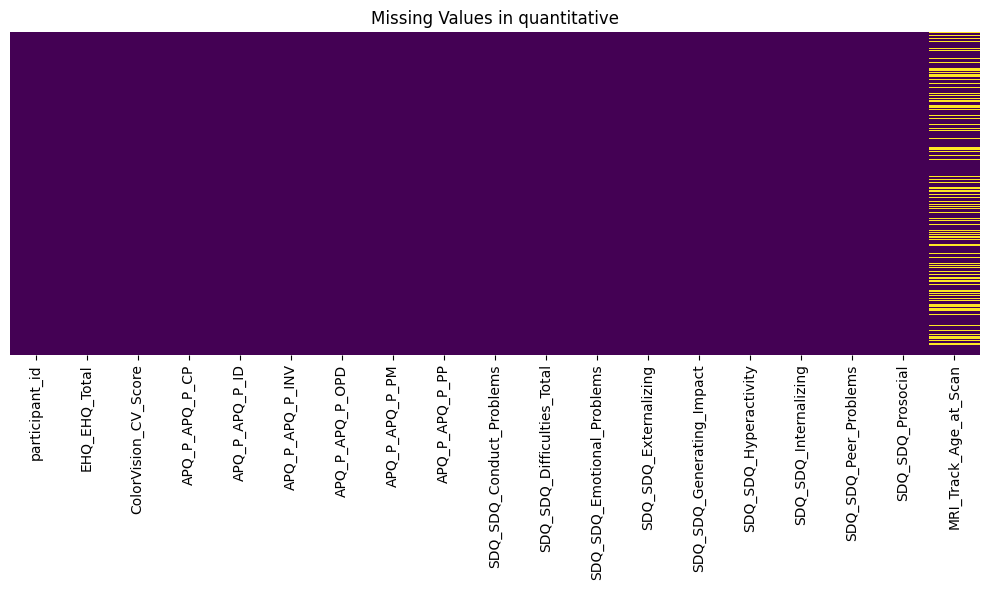


Missing values in quantitative:


Missing Values  Percentage
MRI_Track_Age_at_Scan             360   29.678483

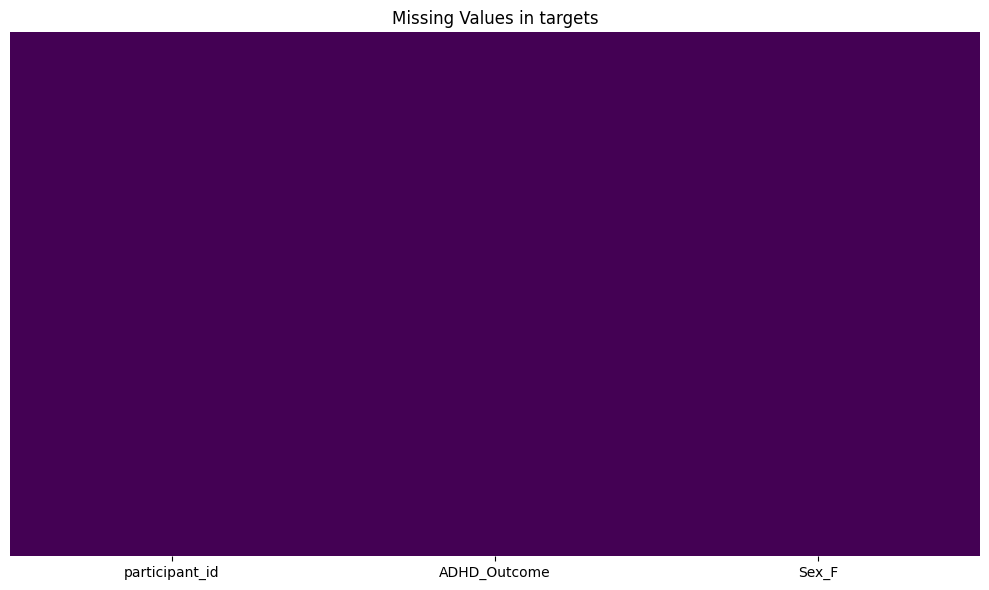


Missing values in targets:


Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []

In [23]:
def plot_missing_values(df, title):
    """Plot missing values heatmap."""
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")
    plt.title(f"Missing Values in {title}")
    plt.tight_layout()
    plt.show()

    missing = df.isnull().sum()
    missing_pct = (missing / len(df)) * 100
    missing_data = pd.DataFrame({"Missing Values": missing, "Percentage": missing_pct})
    print(f"\nMissing values in {title}:")
    display(missing_data[missing_data["Missing Values"] > 0])


for name, df in dfs.items():
    plot_missing_values(df, name)